In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
df=pd.read_excel('Adidas US Sales Datasets.xlsx')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


## Preliminary data cleaning

In [144]:
df.isnull().sum()

Unnamed: 0     9652
Unnamed: 1        3
Unnamed: 2        2
Unnamed: 3        3
Unnamed: 4        3
Unnamed: 5        3
Unnamed: 6        3
Unnamed: 7        3
Unnamed: 8        3
Unnamed: 9        3
Unnamed: 10       3
Unnamed: 11       3
Unnamed: 12       3
Unnamed: 13       3
dtype: int64

In [145]:
# Drop 1st column
df.drop('Unnamed: 0',axis='columns',inplace=True)

In [146]:
# We will drop all other Nan values row wise
df.dropna(axis=0,inplace=True)

In [147]:
#We note that the first row is actually the column header
columns=df.iloc[0:1,:]
columns

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method


In [148]:
c=[]
for j in df.columns:
    c.append(columns[j][3])

In [149]:
c

['Retailer',
 'Retailer ID',
 'Invoice Date',
 'Region',
 'State',
 'City',
 'Product',
 'Price per Unit',
 'Units Sold',
 'Total Sales',
 'Operating Profit',
 'Operating Margin',
 'Sales Method']

In [150]:
df.columns=c

In [151]:
df.drop(3,axis=0,inplace=True)

In [152]:
df.reset_index(inplace=True)
df.head()

,index,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,8,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [153]:
df.drop('index',axis='columns',inplace=True)

In [154]:
df.head(3)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store


## General Insights

In [155]:
df.shape

(9648, 13)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [157]:
df.describe()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
count,9648,9648,9648,9648,9648,9648,9648,9648.0,9648,9648.0,9648.0,9648.00,9648
unique,6,4,724,5,50,52,6,146.0,361,3512.0,6510.0,127.00,3
top,Foot Locker,1185732,2021-01-17 00:00:00,West,California,Portland,Men's Street Footwear,50.0,225,100000.0,21000.0,0.35,Online
freq,2637,5265,77,2448,432,360,1610,557.0,207,52.0,34.0,1229.00,4889


In [158]:
df.duplicated().sum()

0

### Converting object columns with numeric values to float

In [159]:
#Function to check float 
def is_float(x):
    try:
        float(x)
        return True
    except:
        return False

In [160]:
is_float('u')

False

In [161]:
df1=df.copy()

In [162]:
df1['Operating Margin']=df1['Operating Margin'].apply(float)

In [163]:
df1['Operating Profit']=df1['Operating Profit'].apply(float)
df1['Total Sales']=df1['Total Sales'].apply(float)
df1['Units Sold']=df1['Units Sold'].apply(float)
df1['Price per Unit']=df1['Price per Unit'].apply(float)
df1['Retailer ID']=df1['Retailer ID'].apply(int)

In [164]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   int64  
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Product           9648 non-null   object 
 7   Price per Unit    9648 non-null   float64
 8   Units Sold        9648 non-null   float64
 9   Total Sales       9648 non-null   float64
 10  Operating Profit  9648 non-null   float64
 11  Operating Margin  9648 non-null   float64
 12  Sales Method      9648 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 980.0+ KB


In [165]:
df1['City'].dtypes

dtype('O')

In [166]:
df1['Retailer ID'].dtypes

dtype('int64')

In [167]:
df1.dtypes

Retailer             object
Retailer ID           int64
Invoice Date         object
Region               object
State                object
City                 object
Product              object
Price per Unit      float64
Units Sold          float64
Total Sales         float64
Operating Profit    float64
Operating Margin    float64
Sales Method         object
dtype: object

### Splitting Categorical and numerical features

In [168]:
categorical=[]
numerical=[]
for i in df1.dtypes.index:
    if df1[i].dtypes=='O' and i!='Invoice Date':
        categorical.append(i)
    else:
        numerical.append(i)

In [169]:
categorical

['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method']

In [170]:
numerical

['Retailer ID',
 'Invoice Date',
 'Price per Unit',
 'Units Sold',
 'Total Sales',
 'Operating Profit',
 'Operating Margin']

In [171]:
df1.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


## Plotting of categorical features

### Univariate Distributions

In [172]:
# Bar graphs
def plot_bar(y,x):
    for i in x:
        %matplotlib inline
        plt.bar(y[i].value_counts().index,y[i].value_counts(),width=0.5)
        plt.xticks(y[i].value_counts().index, rotation='vertical')
        plt.title(i)
        plt.show();
        print('*'*100)

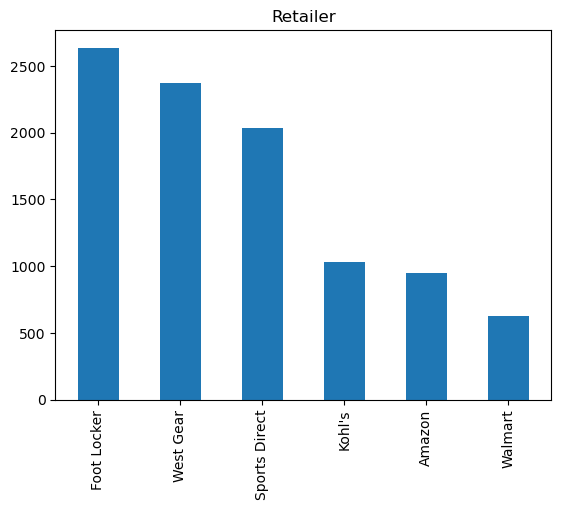

****************************************************************************************************


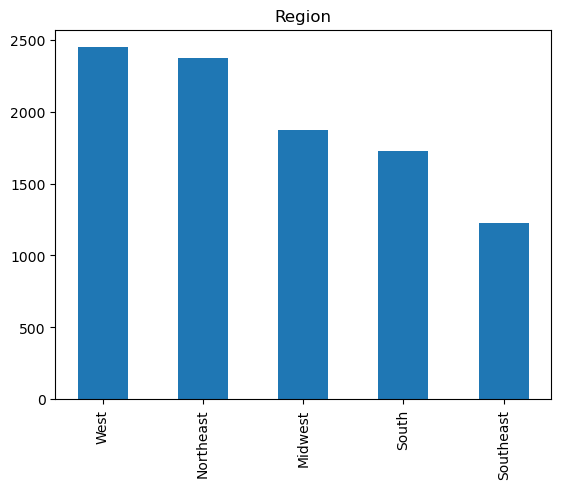

****************************************************************************************************


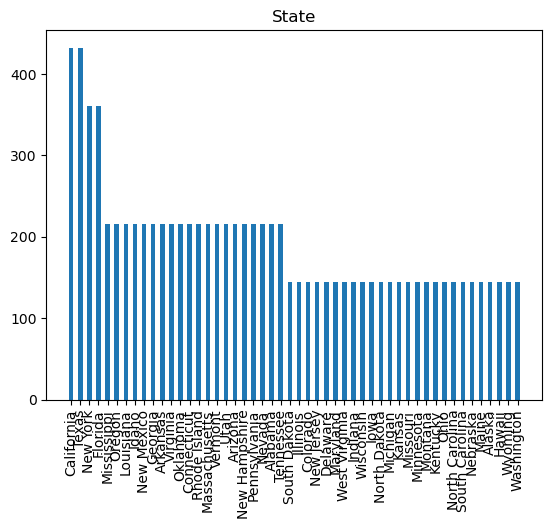

****************************************************************************************************


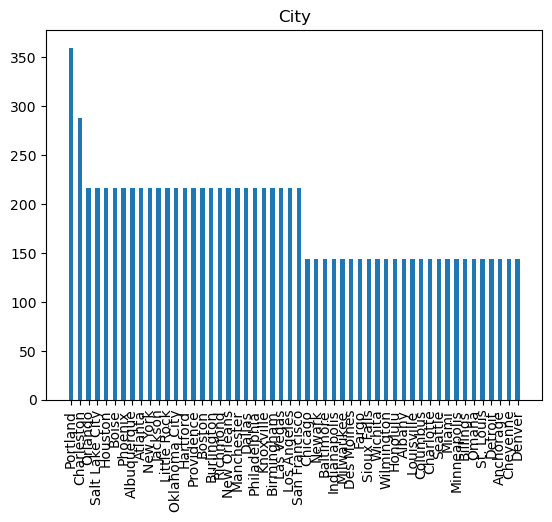

****************************************************************************************************


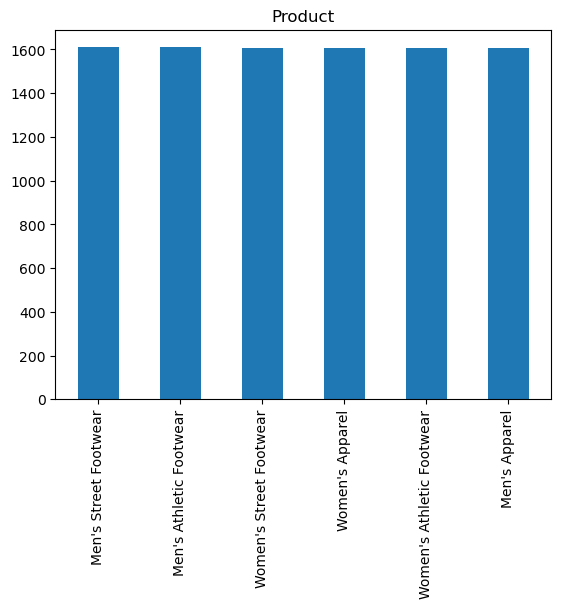

****************************************************************************************************


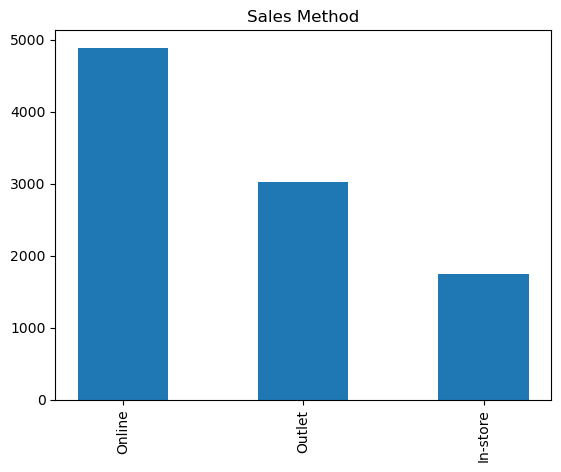

****************************************************************************************************


In [173]:
plot_bar(df1,categorical)

We now have the following insights:

1. Maximum invoice generated by Foot Locker and minimum by walmart.
2. Maximum invoice generated by west region and minimum by southeast.
3. State and city follow a similar distribution.
4. Invoice genrated by each product is almost same.
5. Maximum invoice genrated by online sales method.

## Removing Outliers

### Using z score   (for normally distributed numerical features)

In [174]:
# Function to remove outliers from dataframe, y is dataframe and x is feature name list
def z_removal(y,x):
    a=np.mean(y[x])
    b=np.std(y[x])
    upper=a+(2*b)
    lower=a-(2*b)
    #print(a,b,upper,lower)
    for i in range(0,len(y)):
        #print(i)
        if (y[x][i]<=lower or y[x][i]>=upper):
            y.drop(i,axis=0,inplace=True)
    y.reset_index(inplace=True)
    y.drop('index',axis='columns',inplace=True)
    

#### Visualizing histograms of numerical features

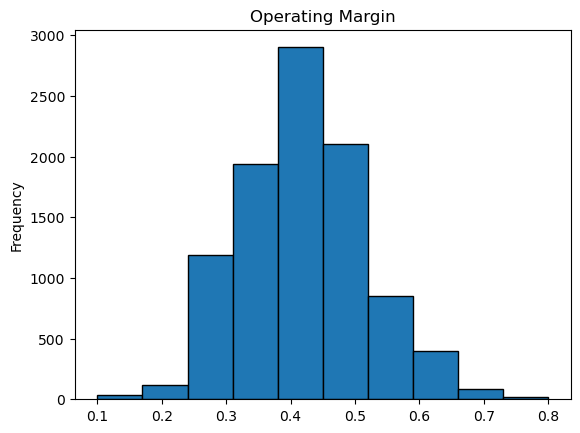

In [175]:
df1['Operating Margin'].plot.hist(bins=10,edgecolor='k',title='Operating Margin');

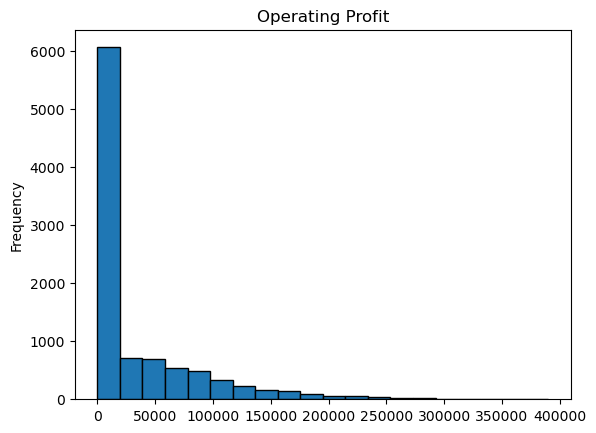

In [176]:
df1['Operating Profit'].plot.hist(bins=20,edgecolor='k',title='Operating Profit');

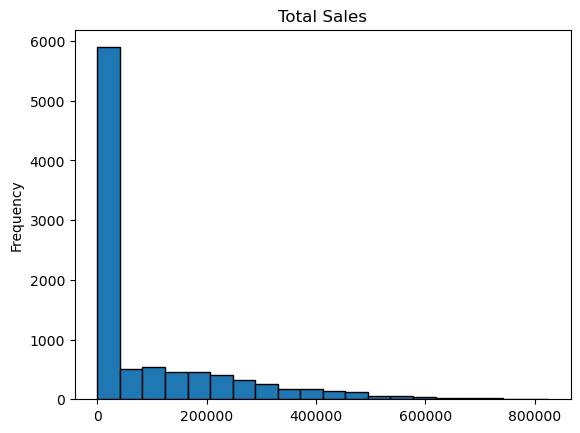

In [177]:
df1['Total Sales'].plot.hist(bins=20,edgecolor='k',title='Total Sales');

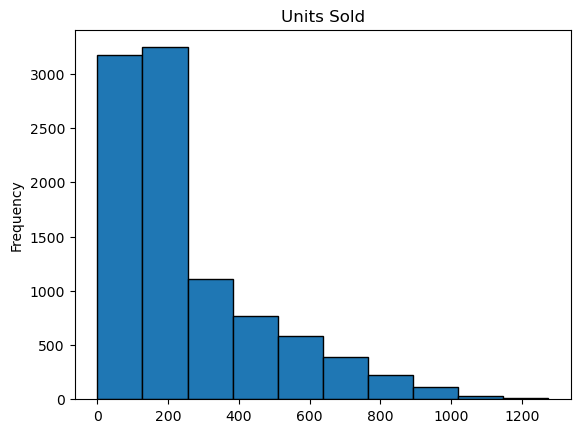

In [178]:
df1['Units Sold'].plot.hist(bins=10,edgecolor='k',title='Units Sold');

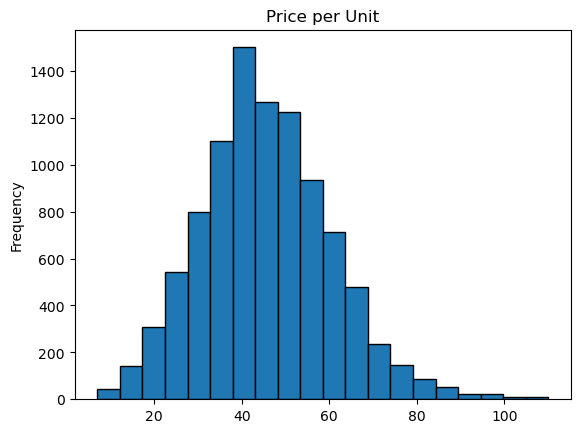

In [179]:
df1['Price per Unit'].plot.hist(bins=20,edgecolor='k',title='Price per Unit');

We notice that the following two features have normal like distribution:

1. Operating Margin
2. Price per Unit
    
We will remove outliers of these features by z-score method

In [180]:
df3=df1.copy()

In [181]:
len(df3)

9648

In [182]:
z_removal(df3,'Operating Margin')

In [183]:
df1.shape

(9648, 13)

In [184]:
df3.shape

(9195, 13)

In [185]:
z_removal(df3,'Price per Unit')

In [186]:
df3.shape

(8749, 13)

In [187]:
df3.to_excel(r'C:\Users\singh\Desktop\Data Science\Project Practice\Adidas\archive\Adidas_SalesData.xlsx',sheet_name='Adidas_SalesData', index=False)

In [188]:
df4=df3.copy()

## Outlier Removal using IQR method

In [189]:
def iqr_removal(y,x):
    a=np.percentile(y[x],25)
    b=np.percentile(y[x],75)
    IQR = b - a
    thold=1.5
    outlier_step = IQR * thold
    print(a,b,IQR,thold,outlier_step)
    for i in range(0,len(y)):
        #print(i)
        if (y[x][i]<=a-outlier_step or y[x][i]>=a+(2*outlier_step)):
            y.drop(i,axis=0,inplace=True)   
    y.reset_index(inplace=True)
    y.drop('index',axis='columns',inplace=True)    

### Pie plots for categorical

In [190]:
len(categorical)

6

In [191]:
def pie_plot(y,x):
    for i in x:
        
        plt.pie(y[i].value_counts(),labels=y[i].value_counts().index,autopct='%1.0f%%')
        plt.title(i)
        plt.show();
        print('*'*100)

In [192]:
pie_categories=['Retailer','Region','Product','Sales Method']

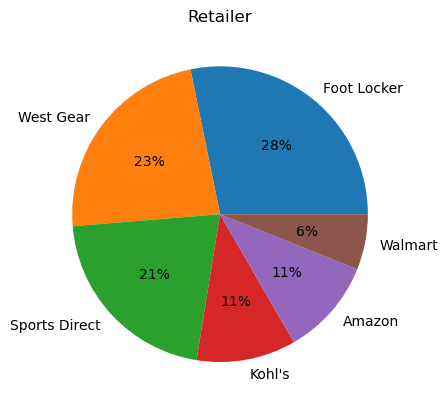

****************************************************************************************************


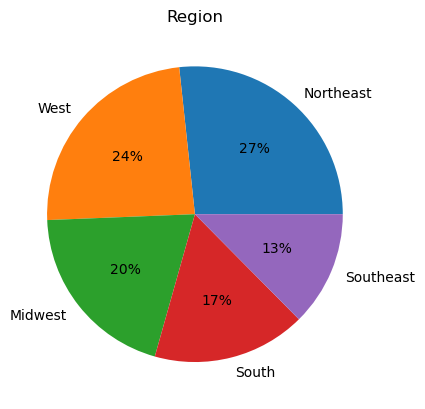

****************************************************************************************************


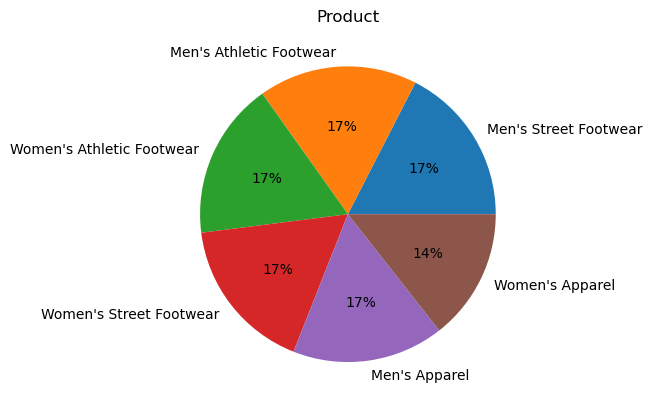

****************************************************************************************************


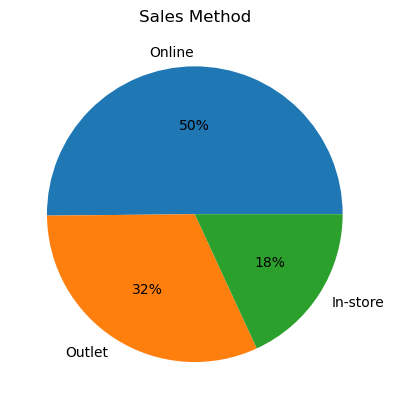

****************************************************************************************************


In [193]:
pie_plot(df3,pie_categories)

We now have the following insights:

1. Maximum invoice generated by Foot Locker and minimum by walmart.
2. Maximum invoice generated by west region and minimum by southeast.
3. Invoice genrated by each product is almost same.
4. Maximum invoice genrated by online sales method.

# Sales Method Optimization

In [194]:
df4=df3.groupby('Sales Method')[['Total Sales']].sum()
df5=df3.groupby('Sales Method')[['Operating Profit']].sum()
df6=df3.groupby('Sales Method')[['Operating Margin']].mean()
df7=df3.groupby('Sales Method')[['Units Sold']].sum()
dfz=df3.groupby('Sales Method')[['Price per Unit']].mean()

In [195]:
dfz

,Price per Unit
Sales Method,
In-store,46.570978
Online,44.984503
Outlet,41.628963


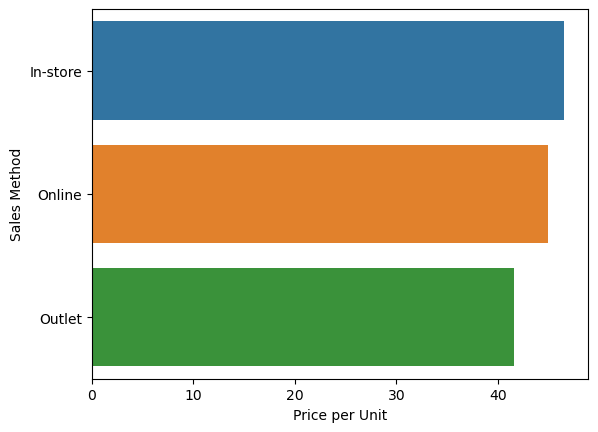

In [196]:
sns.barplot(data=dfz.sort_values(by='Price per Unit',ascending=False),y=dfz.sort_values(by='Price per Unit',ascending=False).index,x='Price per Unit');

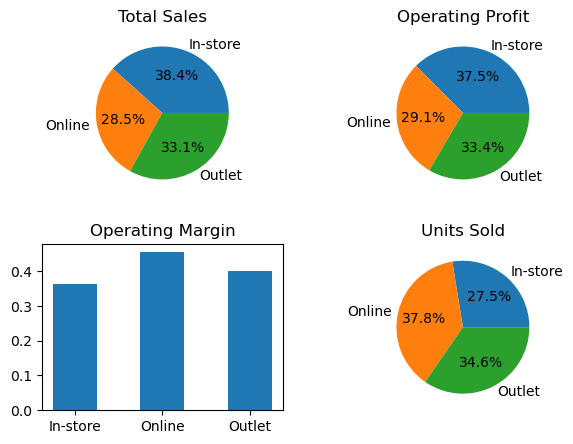

In [197]:
plt.subplot(2,2,1)
plt.tight_layout(pad=2)
plt.pie(df4['Total Sales'],labels=df4['Total Sales'].index,autopct='%1.1f%%')
plt.title('Total Sales');

plt.subplot(2,2,2)
plt.tight_layout(pad=2)
plt.pie(df5['Operating Profit'],labels=df5['Operating Profit'].index,autopct='%1.1f%%')
plt.title('Operating Profit');

plt.subplot(2,2,3)
plt.tight_layout(pad=2)
plt.bar(df6['Operating Margin'].index,df6['Operating Margin'],width=0.5)
plt.title('Operating Margin');

plt.subplot(2,2,4)
plt.tight_layout(pad=2)
plt.pie(df7['Units Sold'],labels=df7['Units Sold'].index,autopct='%1.1f%%')
plt.title('Units Sold');


We can now say that:

1. Max sales is instore, though most transactions are online.
2. Profit is also max in instore.
3. Maximum operating margin is in online.

#### Suggested Action:

1. Increasing online sales : For a given sales, online sales method produces the maximum profit as it has highest operating margin. Thus, focus must be on increasing online sales for generating max profit per unit sales done.

2. Increase per unit cost of online products: As unit solds online are already maximum (37.8%), hiking the price even by a small margin will bring good profit. Operation costs will be low too as operating margin is highest online.

#### Validation of action

The suggested action relies on the fact that operating margin is highest in online mode. But is this statistically significant? ,i.e. is our sample genralizable to wider population? We will carry out Anova Test to make sure.

## Anova for sales method vs operating margin

H0: Null Hypothesis: The sales method has no effect on Operating Margin.

H1: Alternate Hypothesis: Sales Method has a effect on Operating Margin.

In [198]:
import scipy
from scipy import stats
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

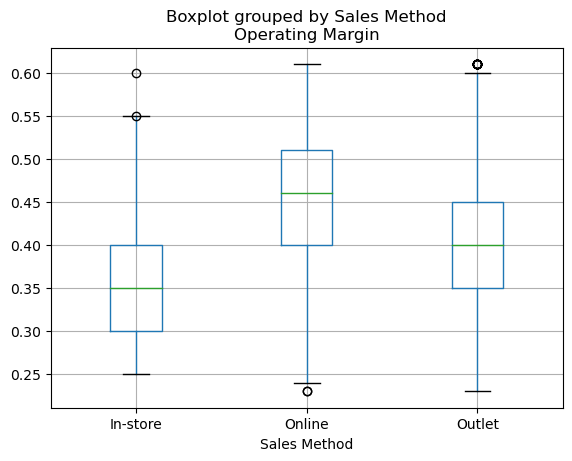

In [199]:
df3.boxplot('Operating Margin',by='Sales Method');

In [200]:
df9=df3[['Operating Margin','Sales Method']]
df9.columns=['op','salesmethod']

In [201]:
formula='op ~ C(salesmethod)'
new=ols(formula,data=df9).fit()
an=sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
C(salesmethod),11.663539,2.0,1026.101436,0.0
Residual,49.707226,8746.0,NaN,NaN


<font color=blue>
    
**Interpretation: Clearly, we see that the p value<0.05. Thus we reject the null hypothesis.**

<font color=red>
    
**Conclusion: The sales method does has an effect on operating margin, we can thus move forward with our suggested actions.**

## Optimizing Sales Region

In [202]:
df10=df3.groupby('Region')[['Total Sales']].sum()
df11=df3.groupby('Region')[['Operating Profit']].sum()
df12=df3.groupby('Region')[['Operating Margin']].mean()
df13=df3.groupby('Region')[['Units Sold']].sum()
df14=df3.groupby('Region')[['Price per Unit']].mean()

In [203]:
df14.sort_values(by='Price per Unit',ascending=False)

,Price per Unit
Region,
Southeast,47.436876
West,47.422636
Northeast,46.418236
Midwest,40.611778
South,37.968005


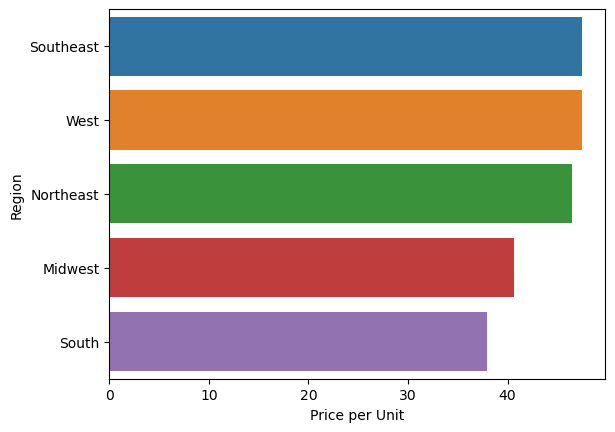

In [204]:
sns.barplot(data=df14.sort_values(by='Price per Unit',ascending=False),y=df14.sort_values(by='Price per Unit',ascending=False).index,x='Price per Unit');

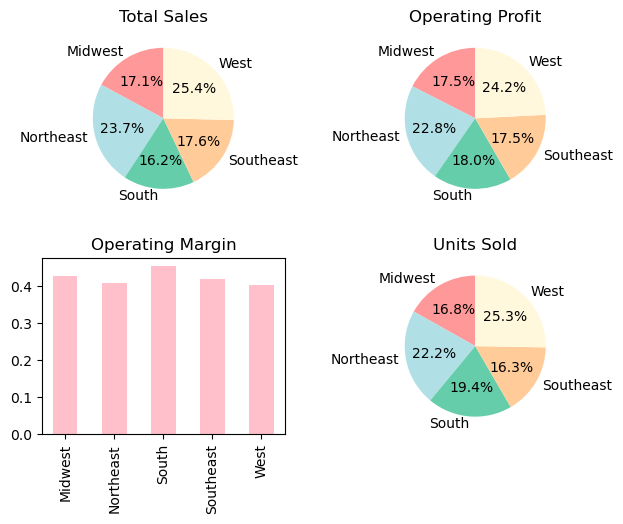

In [205]:
colors = ['#ff9999','powderblue','mediumaquamarine','#ffcc99','cornsilk']
plt.subplot(2,2,1)
plt.tight_layout(pad=2)
plt.pie(df10['Total Sales'],labels=df10['Total Sales'].index,autopct='%0.1f%%',colors=colors,startangle=90)
plt.title('Total Sales');

plt.subplot(2,2,2)
plt.tight_layout(pad=2)
plt.pie(df11['Operating Profit'],labels=df11['Operating Profit'].index,autopct='%0.1f%%',colors=colors,startangle=90)
plt.title('Operating Profit');

plt.subplot(2,2,3)
#plt.tight_layout(pad=0)
plt.bar(df12['Operating Margin'].index,df12['Operating Margin'],width=0.5,color='pink')
plt.xticks(range(len(df12['Operating Margin'].index)), df12['Operating Margin'].index, rotation='vertical')
plt.title('Operating Margin');

plt.subplot(2,2,4)
#plt.tight_layout(pad=0)
plt.pie(df13['Units Sold'],labels=df13['Units Sold'].index,autopct='%0.1f%%',colors=colors,startangle=90)
plt.title('Units Sold');

We can now say that:

1. Max sales is West, least in South.
2. Max profit in West, least in Southeast and Midwest.
3. Maximum operating margin is in South.
4. Max units sold in West, least in Southeast.
5. Max price per unit is in West and lowest in East.

#### Suggested Action:

1. Increase units sold in southern region : For a given sales, southern region produce the maximum profit as it has highest operating margin. Thus, focus must be on increasing units sold there.

2. If possible, avoid discount in southern region, as it already has the minimum price per unit. Further reducing it will counteract suggestion 1.

#### Validation of action

The suggested action relies on the fact that operating margin is highest in southern region. But is this statistically significant? ,i.e. is our sample genralizable to wider population? We will carry out Anova Test to make sure.

## Anova on operating margin vs region

H0: Null Hypothesis: The region has no effect on Operating Margin.

H1: Alternate Hypothesis: Region has a effect on Operating Margin.

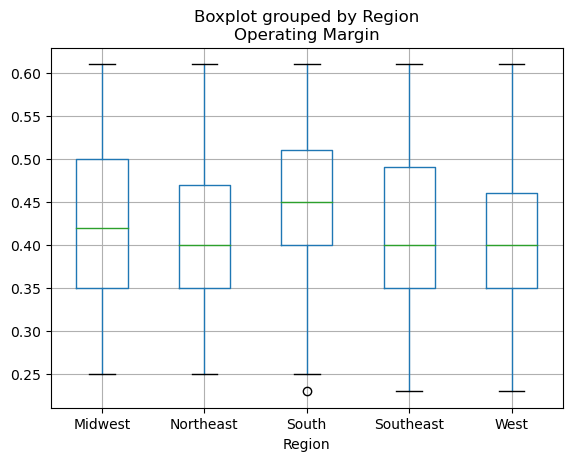

In [206]:
df3.boxplot('Operating Margin',by='Region');

In [207]:
df15=df3[['Operating Margin','Region']]
df15.columns=['op','Region']

In [208]:
formula='op ~ C(Region)'
new=ols(formula,data=df15).fit()
an=sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
C(Region),2.608624,4.0,97.042957,6.286062e-81
Residual,58.762141,8744.0,NaN,NaN


<font color=blue>
    
**Interpretation: Clearly, we see that the p value<0.05. Thus we reject the null hypothesis.**

<font color=red>
    
**Conclusion: The region does has an effect on operating margin, thus our suggestion holds for wider population.**

## Optimizing Product

In [209]:
df16=df3.groupby('Product')[['Total Sales']].sum()
df17=df3.groupby('Product')[['Operating Profit']].sum()
df18=df3.groupby('Product')[['Operating Margin']].mean()
df19=df3.groupby('Product')[['Units Sold']].sum()
df20=df3.groupby('Product')[['Price per Unit']].mean()

In [210]:
df18

,Operating Margin
Product,
Men's Apparel,0.405888
Men's Athletic Footwear,0.407796
Men's Street Footwear,0.443065
Women's Apparel,0.432659
Women's Athletic Footwear,0.419375
Women's Street Footwear,0.409126


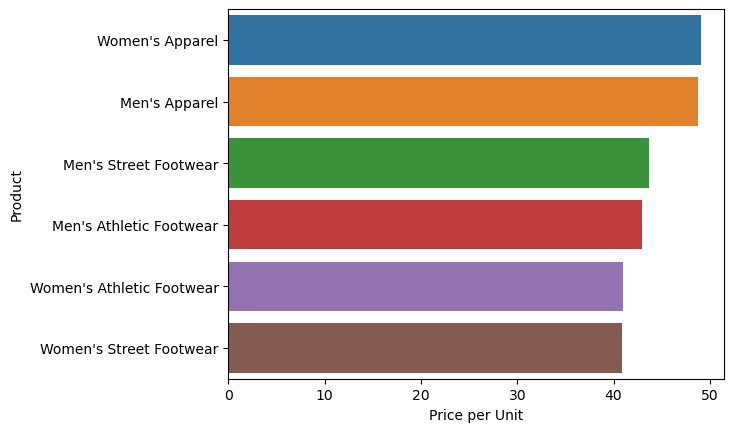

In [211]:
sns.barplot(data=df20.sort_values(by='Price per Unit',ascending=False),y=df20.sort_values(by='Price per Unit',ascending=False).index,x='Price per Unit');

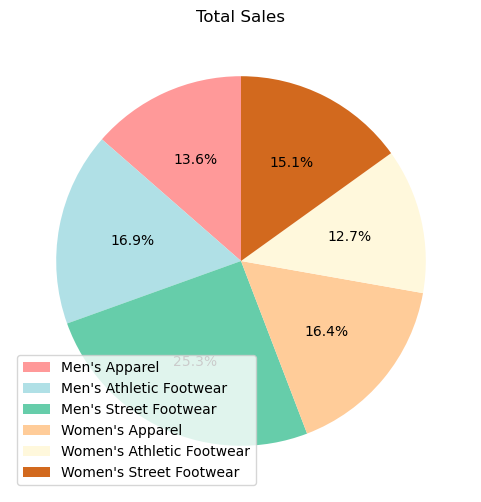

In [212]:
plt.figure(figsize=(6,6))
colors1 = ['#ff9999','powderblue','mediumaquamarine','#ffcc99','cornsilk','chocolate']
plt.pie(df16['Total Sales'],autopct='%0.1f%%',colors=colors1,startangle=90)
plt.legend(df16['Total Sales'].index)
plt.title('Total Sales');

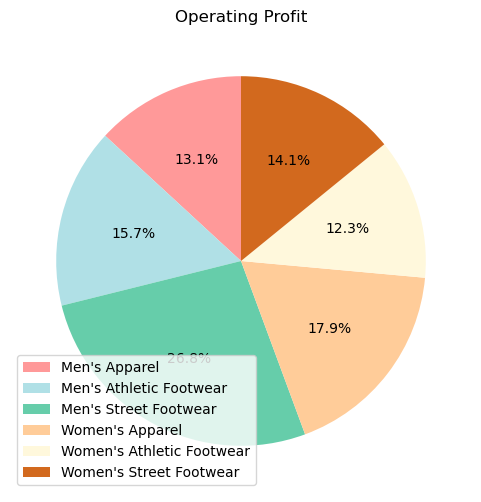

In [213]:
plt.figure(figsize=(6,6))
plt.pie(df17['Operating Profit'],autopct='%0.1f%%',colors=colors1,startangle=90)
plt.legend(df17['Operating Profit'].index)
plt.title('Operating Profit');

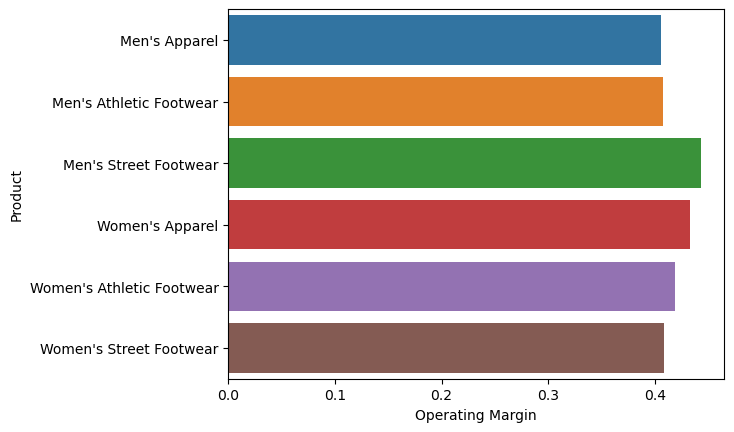

In [214]:
sns.barplot(data=df18,y=df18['Operating Margin'].index,x='Operating Margin');

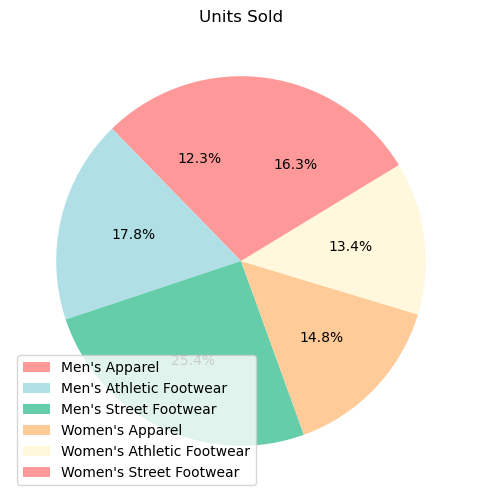

In [215]:
plt.figure(figsize=(6,6))
plt.pie(df19['Units Sold'],autopct='%0.1f%%',colors=colors,startangle=90)
plt.legend(df19['Units Sold'].index)
plt.title('Units Sold');

We can now say that:

1. Max sales is in Men Street Footwear, least in women footwear.
2. Max profit in Men Street Footwear, least in women athletic footwear.
3. Maximum operating margin is in Men Street Footwear, least in men apparel.
4. Max units sold in Men Street Footwear, least in Women athletic footwear.
5. Max price per unit is Apparel. (For obvious reasons; This info is reduntant)

#### Suggested Action:

1. Target female population for footwear (Increase units sold of female footwear) : Although female footwear does not has maximum operating margin, it is still appreciable. 

#### Validation of action

The suggested action relies on the fact that product influences operating margin. But is this statistically significant? ,i.e. is our sample genralizable to wider population? We will carry out Anova Test to make sure.

## Anova on operating margin vs product

H0: Null Hypothesis: The product has no effect on Operating Margin.

H1: Alternate Hypothesis: Product has an effect on Operating Margin.

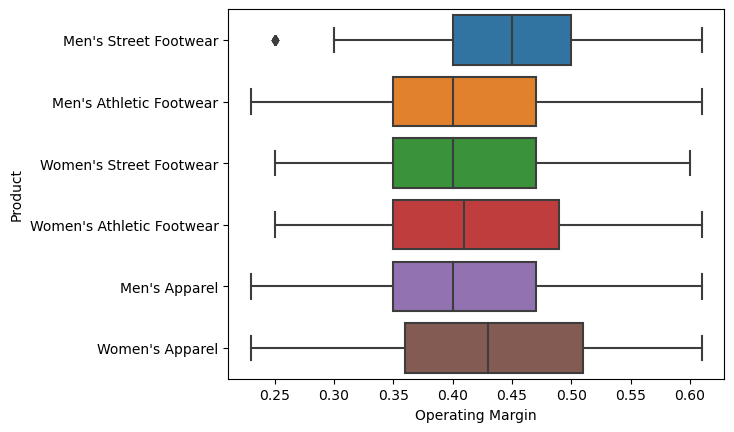

In [216]:
sns.boxplot(data=df3,x='Operating Margin',y='Product');

In [217]:
df21=df3[['Operating Margin','Product']]
df21.columns=['op','Product']

In [218]:
formula='op ~ C(Product)'
new=ols(formula,data=df21).fit()
an=sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
C(Product),1.703369,5.0,49.918575,3.702765e-51
Residual,59.667396,8743.0,NaN,NaN


<font color=blue>
    
**Interpretation: Clearly, we see that the p value<0.05. Thus we reject the null hypothesis.**

<font color=red>
    
**Conclusion: The product does has an effect on operating margin, thus our suggestion holds for wider population.**

## Optimizing Retailer

In [219]:
df22=df3.groupby('Retailer')[['Total Sales']].sum()
df23=df3.groupby('Retailer')[['Operating Profit']].sum()
df24=df3.groupby('Retailer')[['Operating Margin']].mean()
df25=df3.groupby('Retailer')[['Units Sold']].sum()
df26=df3.groupby('Retailer')[['Price per Unit']].mean()

In [220]:
df24

,Operating Margin
Retailer,
Amazon,0.416386
Foot Locker,0.414652
Kohl's,0.414248
Sports Direct,0.429265
Walmart,0.409492
West Gear,0.422713


In [221]:
df26

,Price per Unit
Retailer,
Amazon,48.335491
Foot Locker,43.923015
Kohl's,44.503680
Sports Direct,41.957320
Walmart,44.515038
West Gear,44.500990


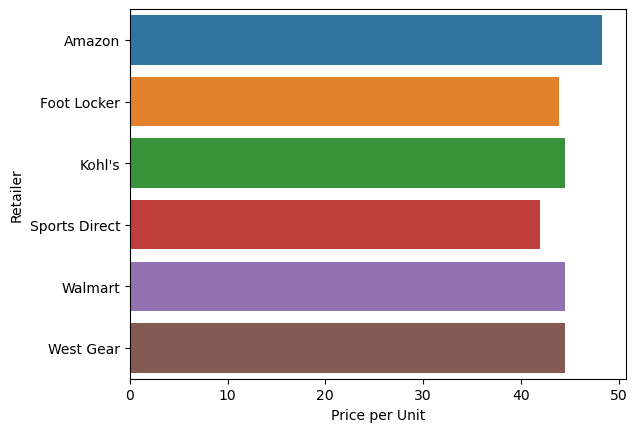

In [222]:
sns.barplot(data=df26,y=df26['Price per Unit'].index,x='Price per Unit');

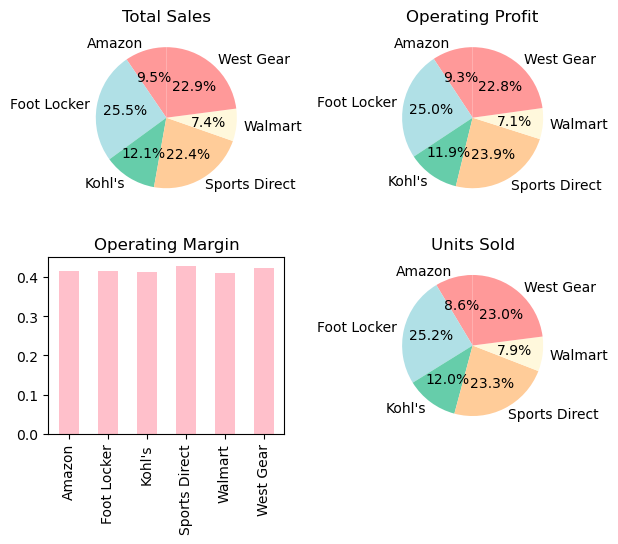

In [223]:
colors = ['#ff9999','powderblue','mediumaquamarine','#ffcc99','cornsilk']
plt.subplot(2,2,1)
plt.tight_layout(pad=2)
plt.pie(df22['Total Sales'],labels=df22['Total Sales'].index,autopct='%0.1f%%',colors=colors,startangle=90)
plt.title('Total Sales');

plt.subplot(2,2,2)
plt.tight_layout(pad=2)
plt.pie(df23['Operating Profit'],labels=df23['Operating Profit'].index,autopct='%0.1f%%',colors=colors,startangle=90)
plt.title('Operating Profit');

plt.subplot(2,2,3)
#plt.tight_layout(pad=0)
plt.bar(df24['Operating Margin'].index,df24['Operating Margin'],width=0.5,color='pink')
plt.xticks(range(len(df24['Operating Margin'].index)), df24['Operating Margin'].index, rotation='vertical')
plt.title('Operating Margin');

plt.subplot(2,2,4)
#plt.tight_layout(pad=0)
plt.pie(df25['Units Sold'],labels=df25['Units Sold'].index,autopct='%0.1f%%',colors=colors,startangle=90)
plt.title('Units Sold');



We can now say that:

1. Max sales is by Foot Locker, least by Walmart and Amazon.
2. Max profit in Foot Locker, least by walmart and Amazon.
3. Maximum operating margin is by Sports Direct.
4. Max units sold is by Foot Locker, least by Walmart and Amazon.
5. Max price per unit is by Amazon.

#### Suggested Action:

1. Increase units sold in southern region : For a given sales, sports direct produce the maximum profit as it has highest operating margin. Thus, focus must be on increasing units sold there.


#### Validation of action

The suggested action relies on the fact that retailer influences operating margin. But is this statistically significant? ,i.e. is our sample genralizable to wider population? We will carry out Anova Test to make sure.

## Anova on operating margin vs retailer

H0: Null Hypothesis: The retailer has no effect on Operating Margin.

H1: Alternate Hypothesis: Retailer has an effect on Operating Margin.

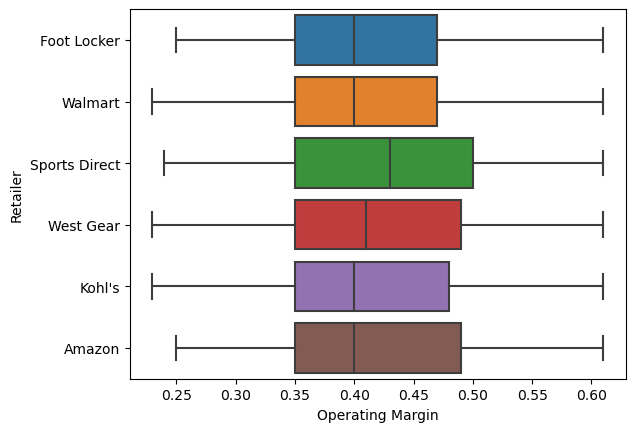

In [224]:
sns.boxplot(data=df3,x='Operating Margin',y='Retailer');

In [225]:
df27=df3[['Operating Margin','Retailer']]
df27.columns=['op','Retailer']

In [226]:
formula='op ~ C(Retailer)'
new=ols(formula,data=df27).fit()
an=sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
C(Retailer),0.343837,5.0,9.851926,2.087734e-09
Residual,61.026929,8743.0,NaN,NaN


Although p value<0.05, lets check it again by removing top 2 retailers.

In [227]:
dfrem1=df3[df3['Retailer']!='Sports Direct']
dfrem=dfrem1[dfrem1['Retailer']!='West Gear']

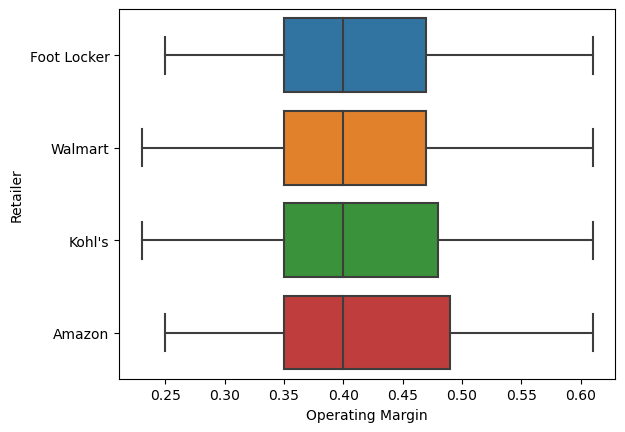

In [228]:
sns.boxplot(data=dfrem,x='Operating Margin',y='Retailer');

In [229]:
df28=dfrem[['Operating Margin','Retailer']]
df28.columns=['op','Retailer']

In [230]:
formula='op ~ C(Retailer)'
new=ols(formula,data=df28).fit()
an=sm.stats.anova_lm(new,typ=2)
an

,sum_sq,df,F,PR(>F)
C(Retailer),0.016630,3.0,0.833205,0.47543
Residual,32.426794,4874.0,NaN,NaN



<font color=blue>
    
**Interpretation: We see that the p value<0.05 only when West Gear and Sports Direct are excluded. Thus we can't reject the null hypothesis.**

<font color=red>
    
**Conclusion: Our suggestion does not generalizes for wider population.**

Finally, the following are the recommendations:

1. Increasing online sales : For a given sales, online sales method produces the maximum profit as it has highest operating margin. Thus, focus must be on increasing online sales for generating max profit per unit sales done.

2. Increase units sold in southern region : For a given sales, southern region produce the maximum profit as it has highest operating margin. Thus, focus must be on increasing units sold there.

3. Target female population for footwear (Increase units sold of female footwear) : Although female footwear does not has maximum operating margin, it is still appreciable. 



If varying price per unit is allowed:

1. If possible, avoid discount in southern region, as it already has the minimum price per unit. Further reducing it will counteract suggestion 1.

2. Increase per unit cost of online products: As unit solds online are already maximum (37.8%), hiking the price even by a small margin will bring good profit. Operation costs will be low too as operating margin is highest online.
